In [1]:
from lblcrn.homogenous_crn.solution import *
from lblcrn.homogenous_crn.sym import *
from lblcrn.homogenous_crn.xps import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


# System Solving

In [ ]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0), {0:1.0000})
x2 = sm.sp('x2', Orbital('1s', 532.2), {0:0})
x3 = sm.sp('x3', Orbital('1s', 530.9), {0:0})
x4 = sm.sp('x4', Orbital('1s', 530.0), {0:0.25})
x53 = sm.sp('x53', Orbital('1s', 531.6), {0:0})
x54 = sm.sp('x54', Orbital('1s', 531.6), {0:0})
x6 = sm.sp('x6', Orbital('1s', 533.2), {0:0})
x7 = sm.sp('x7', Orbital('1s', 535.0), {0:0})

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.167130, 0.794455, 0.199022, 0.300480, 0.127713, 0.400796, 0.394500, 0.000960, 76.964514]

In [3]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            sm
        )
        s = solve(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

Solved for (0, 0)
[0.12380450000000001, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (0, 1)
[0.6190225, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (0, 2)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (0, 3)
[6.190225, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (0, 4)
[12.38045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (1, 0)
[1.238045, 0.052620400000000005, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (1, 1)
[1.238045, 0.263

Solved for (10, 2)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (10, 3)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 2.00398, 0.3945, 0.00096, 76.964514]


Solved for (10, 4)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 4.00796, 0.3945, 0.00096, 76.964514]


Solved for (11, 0)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.039450000000000006, 0.00096, 76.964514]


Solved for (11, 1)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.19725, 0.00096, 76.964514]


Solved for (11, 2)
[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.16713, 0.794455, 0.199022, 0.30048, 0.127713, 0.400796, 0.3945, 0.00096, 76.964514]


Solved for (11, 3)
[1.238045, 0.526204,

In [4]:
import pickle
with open('../ag_regp_rt.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [5]:
sols = pickle.load(open('../data/ag_regp_rt.pkl', 'rb'))

In [10]:
x = read_new_data('../data/ag_30e-3_25.txt', be=0)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [11]:
for s in sols:
    s.ignore = [y1]
    s.process()

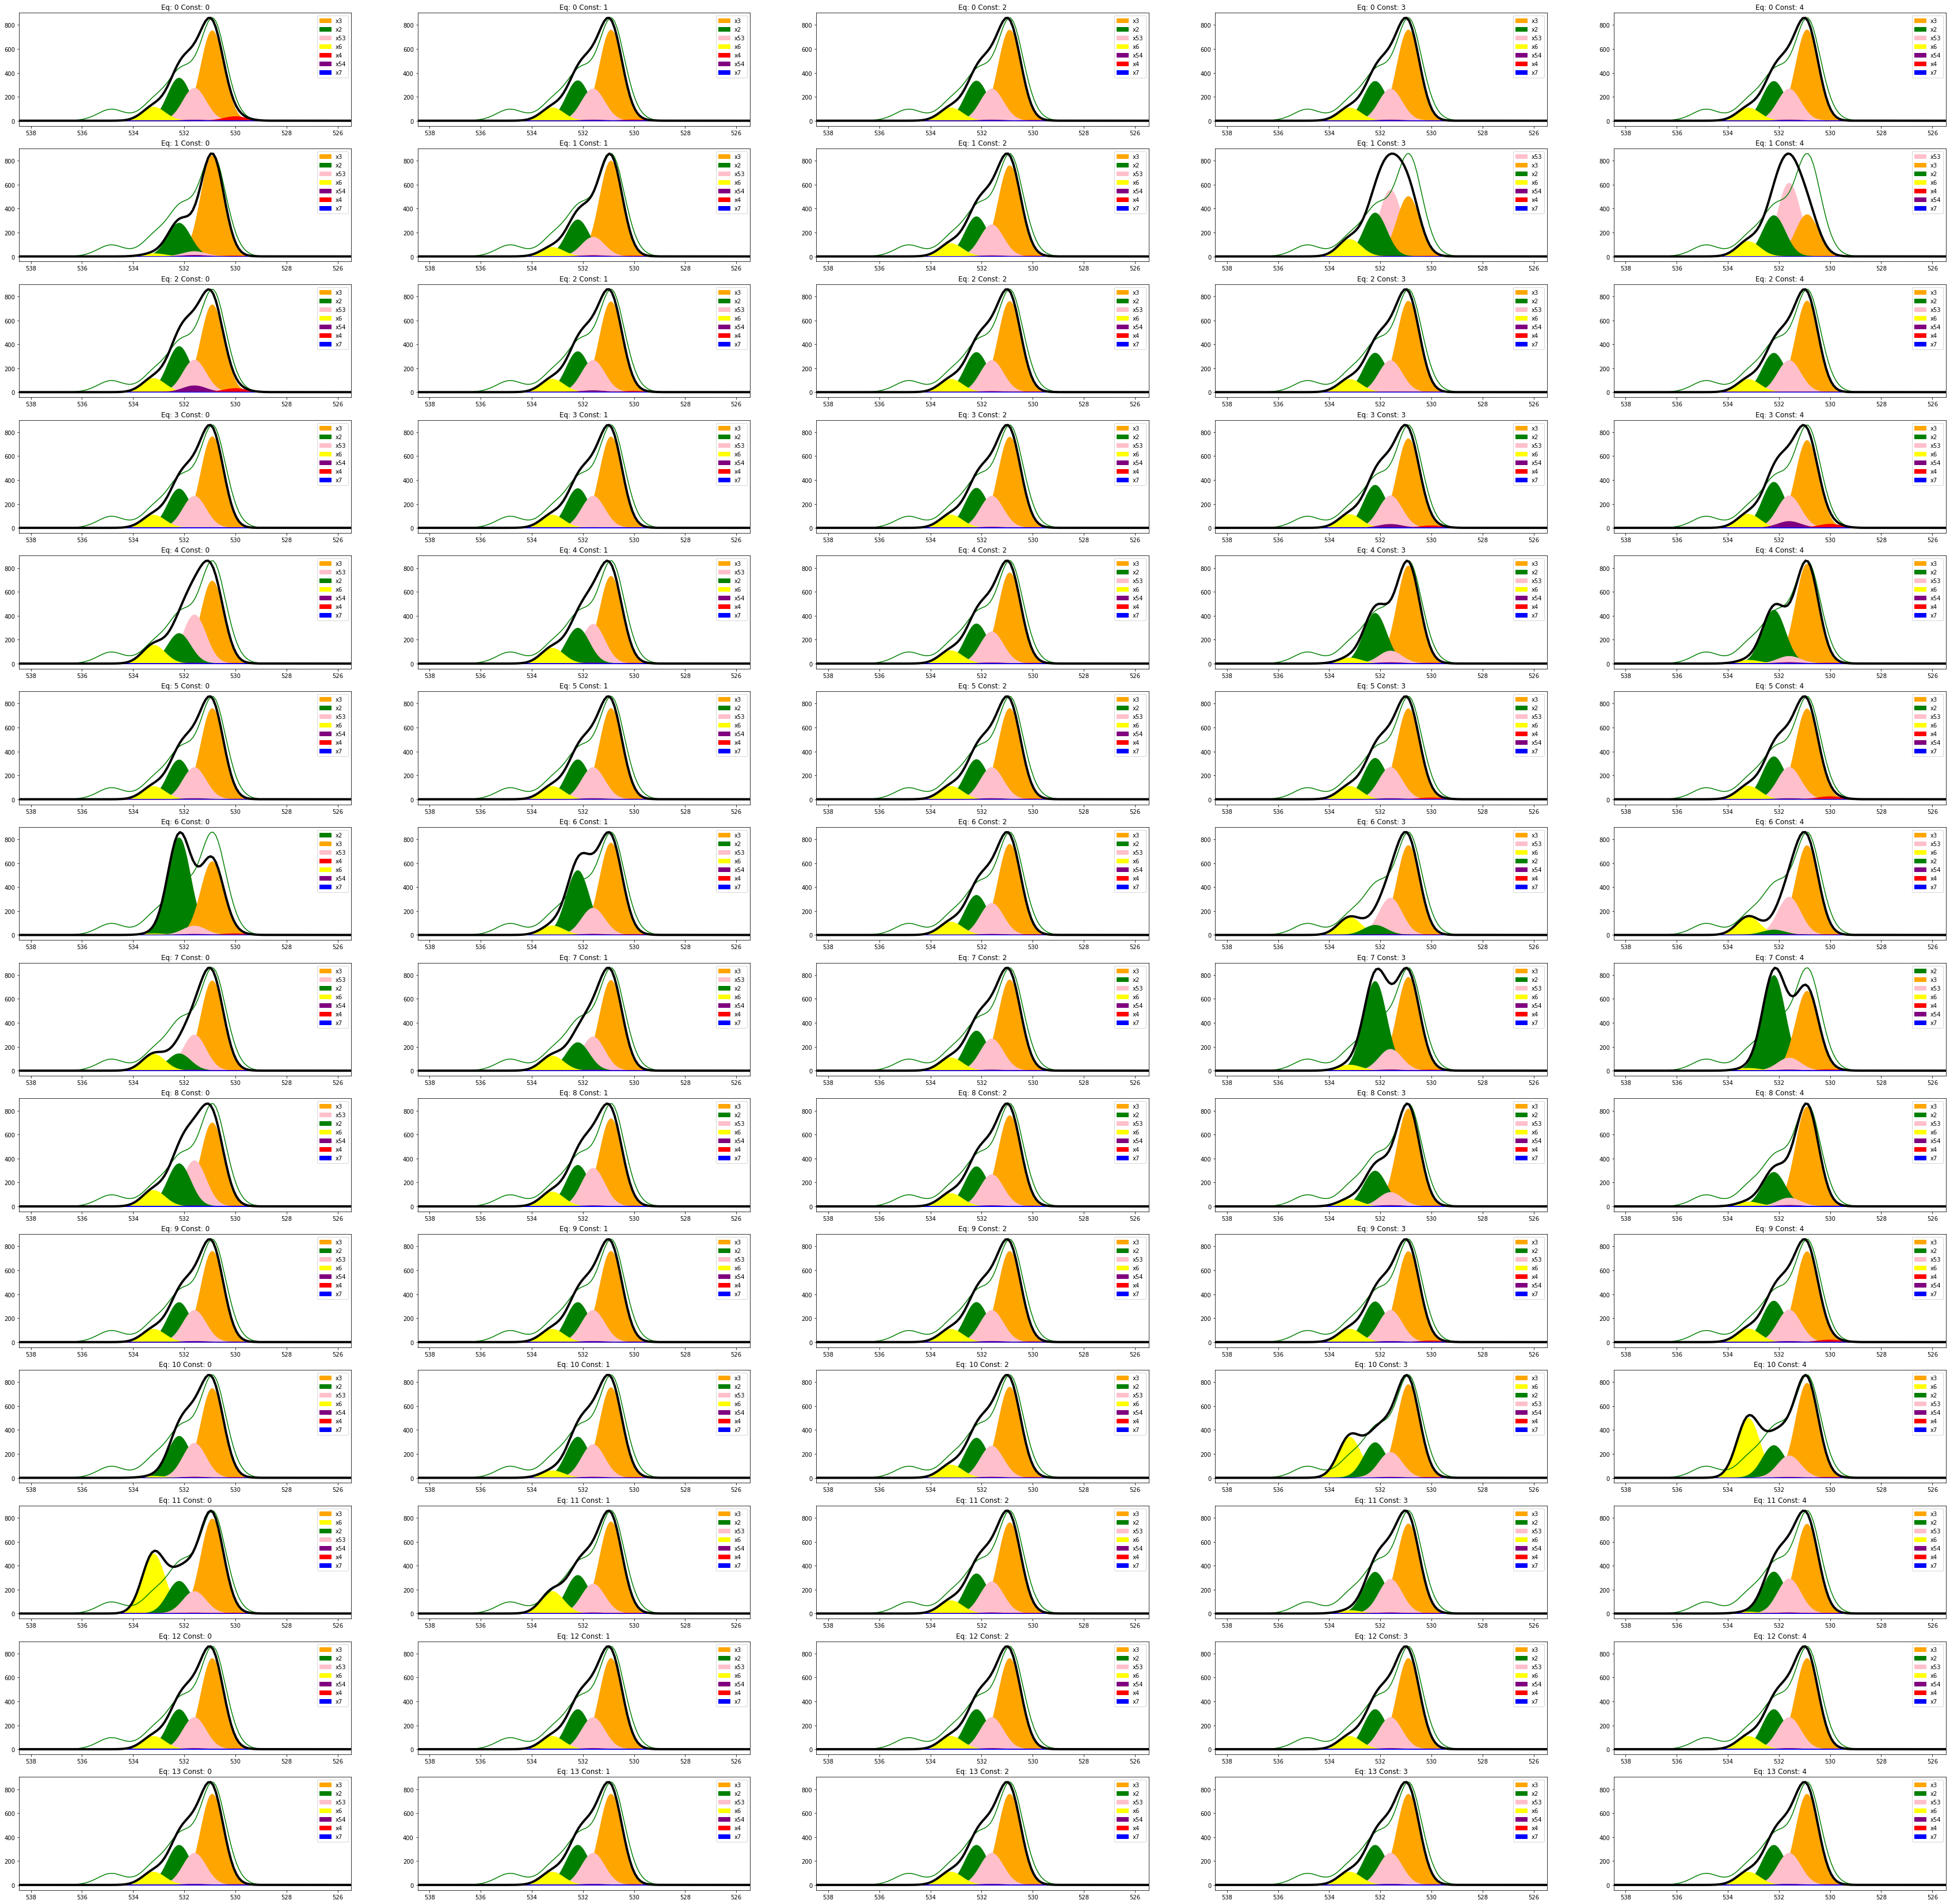

In [12]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True, ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

# RMSE

In [13]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,47.913373,49.592496,49.950607,50.265932,50.307160
1,67.718310,49.004449,49.950607,103.809834,123.354943
2,57.292527,50.460337,49.950607,49.665522,49.638934
3,49.638391,49.758154,49.950607,52.620266,57.292521
4,62.056774,54.528551,49.950607,47.848844,50.050428
5,50.124278,50.045210,49.950607,49.349021,48.953227
6,116.402116,70.208378,49.950607,67.910840,73.940915
7,59.860112,51.421237,49.950607,105.011665,110.996335
8,67.396626,56.540381,49.950607,53.879889,61.740075
9,50.100893,50.033407,49.950607,49.354331,48.759529


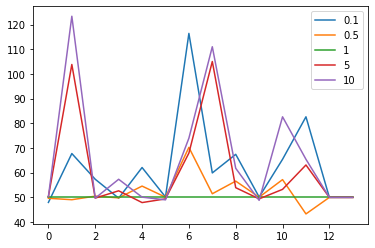

In [14]:
rmses.plot()

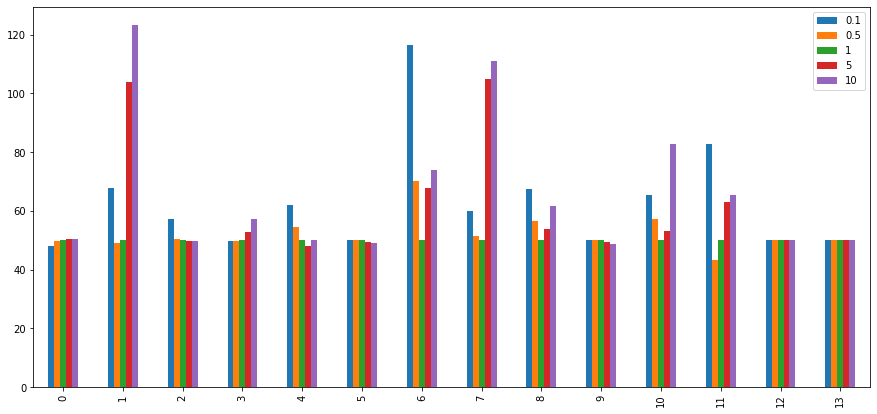

In [15]:
rmses.plot.bar(figsize=(15,7))

In [16]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,47.913373,0.0
0.5,43.252445,11.0
1,49.950607,0.0
5,47.848844,4.0
10,48.759529,9.0


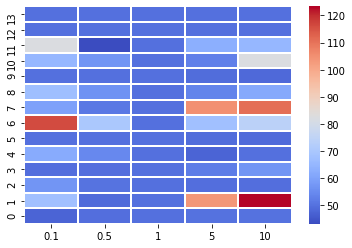

In [17]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

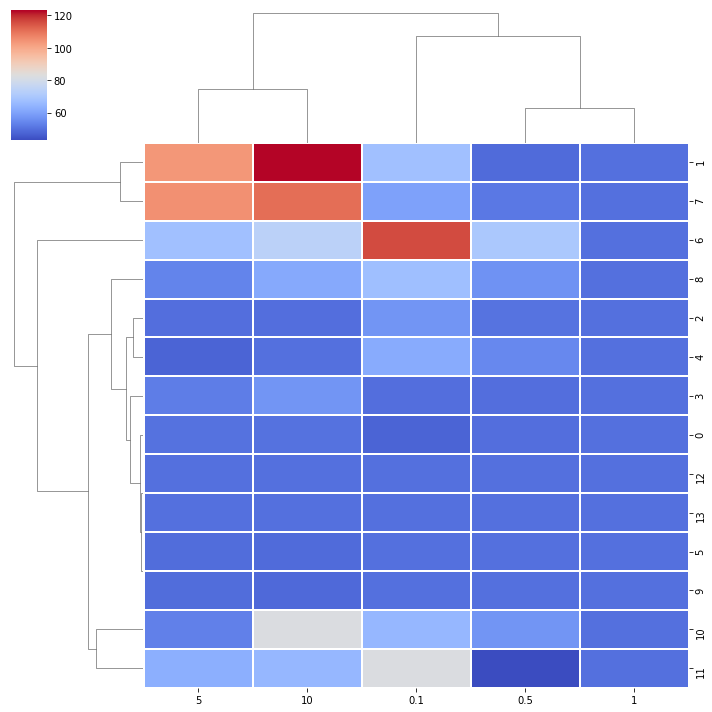

In [18]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)